# Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.
Before attempting to fit a linear model to observed data, a modeler should first determine whether or not there is a relationship between the variables of interest. This does not necessarily imply that one variable causes the other (for example, higher SAT scores do not cause higher college grades), but that there is some significant association between the two variables. A scatterplot can be a helpful tool in determining the strength of the relationship between two variables. If there appears to be no association between the proposed explanatory and dependent variables (i.e., the scatterplot does not indicate any increasing or decreasing trends), then fitting a linear regression model to the data probably will not provide a useful model. A valuable numerical measure of association between two variables is the correlation coefficient, which is a value between -1 and 1 indicating the strength of the association of the observed data for the two variables.

A linear regression line has an equation of the form $Y = a + bX$, where $X$ is the explanatory variable and $Y$ is the dependent variable. The slope of the line is $b$, and $a$ is the intercept (the value of $y$ when $x = 0$).



# Import the required Packages

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Linear Regression Algorithm

In [81]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated


# Loading the generated data set, training the model 


MSE: 343.6357433634881
Accuracy: 0.8009880987121505


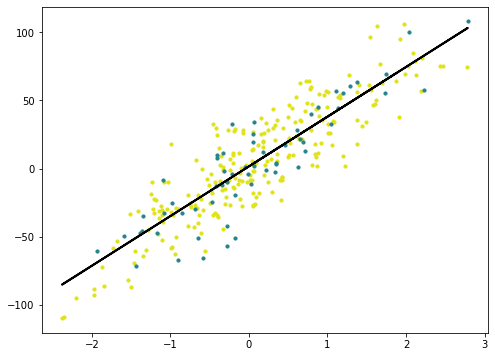

In [82]:
# Testing
if __name__ == "__main__":

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    X, y = datasets.make_regression(n_samples=300, n_features=1, noise=20, random_state=4) #Loading the dataset

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)#Splitting the dataset in a 80%-20% Train-test parts

    regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    acc = r2_score(y_test, predictions)
    print("Accuracy:", acc)
    y_pred_line = regressor.predict(X)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(8, 6))
    m1 = plt.scatter(X_train, y_train, color=cmap(0.95), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.45), s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    plt.show()